In [21]:
# prompt: I have a json file that has text data. this is a sample data in json {"annotator_labels": ["neutral", "entailment", "neutral", "neutral", "neutral"], "captionID": "4705552913.jpg#2", "gold_label": "neutral", "pairID": "4705552913.jpg#2r1n", "sentence1": "Two women are embracing while holding to go packages.", "sentence1_binary_parse": "( ( Two women ) ( ( are ( embracing ( while ( holding ( to ( go packages ) ) ) ) ) ) . ) )", "sentence1_parse": "(ROOT (S (NP (CD Two) (NNS women)) (VP (VBP are) (VP (VBG embracing) (SBAR (IN while) (S (NP (VBG holding)) (VP (TO to) (VP (VB go) (NP (NNS packages)))))))) (. .)))", "sentence2": "The sisters are hugging goodbye while holding to go packages after just eating lunch.", "sentence2_binary_parse": "( ( The sisters ) ( ( are ( ( hugging goodbye ) ( while ( holding ( to ( ( go packages ) ( after ( just ( eating lunch ) ) ) ) ) ) ) ) ) . ) )", "sentence2_parse": "(ROOT (S (NP (DT The) (NNS sisters)) (VP (VBP are) (VP (VBG hugging) (NP (UH goodbye)) (PP (IN while) (S (VP (VBG holding) (S (VP (TO to) (VP (VB go) (NP (NNS packages)) (PP (IN after) (S (ADVP (RB just)) (VP (VBG eating) (NP (NN lunch))))))))))))) (. .)))"}. I want to do EDA on the data
import json
import pandas as pd

#
dev_file_path = '/content/drive/MyDrive/NLP/Project/Input Dataset/snli_1.0_dev.jsonl'

data = []
with open(dev_file_path, 'r') as f:
  for line in f:
    data.append(json.loads(line))

dev_df = pd.DataFrame(data)


test_file_path = '/content/drive/MyDrive/NLP/Project/Input Dataset/snli_1.0_test.jsonl'

data = []
with open(dev_file_path, 'r') as f:
  for line in f:
    data.append(json.loads(line))

test_df = pd.DataFrame(data)


train_file_path = '/content/drive/MyDrive/NLP/Project/Input Dataset/snli_1.0_train.jsonl'

data = []
with open(dev_file_path, 'r') as f:
  for line in f:
    data.append(json.loads(line))

train_df = pd.DataFrame(data)

In [22]:
# Display the first few rows
print("First 5 rows:")
print(dev_df.head())
print(test_df.head())
print(train_df.head())

First 5 rows:
                                    annotator_labels         captionID  \
0   [neutral, entailment, neutral, neutral, neutral]  4705552913.jpg#2   
1  [entailment, entailment, entailment, entailmen...  4705552913.jpg#2   
2  [contradiction, contradiction, contradiction, ...  4705552913.jpg#2   
3  [entailment, entailment, entailment, entailmen...  2407214681.jpg#0   
4  [neutral, neutral, neutral, entailment, entail...  2407214681.jpg#0   

      gold_label               pairID  \
0        neutral  4705552913.jpg#2r1n   
1     entailment  4705552913.jpg#2r1e   
2  contradiction  4705552913.jpg#2r1c   
3     entailment  2407214681.jpg#0r1e   
4        neutral  2407214681.jpg#0r1n   

                                           sentence1  \
0  Two women are embracing while holding to go pa...   
1  Two women are embracing while holding to go pa...   
2  Two women are embracing while holding to go pa...   
3  Two young children in blue jerseys, one with t...   
4  Two young c

In [25]:
# Get information about the dataframe
print("\nDataframe Info:")
print(dev_df.info())
print(test_df.info())
print(train_df.info())


Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   annotator_labels        10000 non-null  object
 1   captionID               10000 non-null  object
 2   gold_label              10000 non-null  object
 3   pairID                  10000 non-null  object
 4   sentence1               10000 non-null  object
 5   sentence1_binary_parse  10000 non-null  object
 6   sentence1_parse         10000 non-null  object
 7   sentence2               10000 non-null  object
 8   sentence2_binary_parse  10000 non-null  object
 9   sentence2_parse         10000 non-null  object
dtypes: object(10)
memory usage: 781.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------

In [27]:
# Count unique values for categorical columns
print("\nUnique values in 'annotator_labels':")
print(dev_df['annotator_labels'].apply(lambda x: ', '.join(x)).value_counts())
print("\nUnique values in 'annotator_labels':")
print(test_df['annotator_labels'].apply(lambda x: ', '.join(x)).value_counts())
print("\nUnique values in 'annotator_labels':")
print(train_df['annotator_labels'].apply(lambda x: ', '.join(x)).value_counts())


Unique values in 'annotator_labels':
annotator_labels
contradiction, contradiction, contradiction, contradiction, contradiction    2148
entailment, entailment, entailment, entailment, entailment                   1955
neutral, neutral, neutral, neutral, neutral                                  1376
entailment, neutral, entailment, entailment, entailment                       180
neutral, neutral, neutral, entailment, neutral                                168
                                                                             ... 
entailment, entailment, contradiction, contradiction, neutral                   1
neutral, entailment, entailment, neutral, contradiction                         1
contradiction, neutral, contradiction, entailment, neutral                      1
neutral, contradiction, entailment, contradiction, contradiction                1
neutral, contradiction, entailment, contradiction                               1
Name: count, Length: 226, dtype: int64

Uni

In [8]:
print("\nUnique values in 'gold_label':")
print(df['gold_label'].value_counts())


Unique values in 'gold_label':
gold_label
entailment       3329
contradiction    3278
neutral          3235
-                 158
Name: count, dtype: int64


In [29]:
# Check for missing values
print("\nMissing values per column:")
print(dev_df.isnull().sum())

print("\nMissing values per column:")
print(train_df.isnull().sum())

print("\nMissing values per column:")
print(test_df.isnull().sum())




Missing values per column:
annotator_labels          0
captionID                 0
gold_label                0
pairID                    0
sentence1                 0
sentence1_binary_parse    0
sentence1_parse           0
sentence2                 0
sentence2_binary_parse    0
sentence2_parse           0
sentence1_length          0
sentence2_length          0
dtype: int64

Missing values per column:
annotator_labels          0
captionID                 0
gold_label                0
pairID                    0
sentence1                 0
sentence1_binary_parse    0
sentence1_parse           0
sentence2                 0
sentence2_binary_parse    0
sentence2_parse           0
dtype: int64

Missing values per column:
annotator_labels          0
captionID                 0
gold_label                0
pairID                    0
sentence1                 0
sentence1_binary_parse    0
sentence1_parse           0
sentence2                 0
sentence2_binary_parse    0
sentence2_parse       

In [30]:
# Explore the length of sentences
dev_df['sentence1_length'] = dev_df['sentence1'].str.len()
dev_df['sentence2_length'] = dev_df['sentence2'].str.len()

print("\nSentence length statistics for sentence1:")
print(dev_df['sentence1_length'].describe())

print("\nSentence length statistics for sentence2:")
print(dev_df['sentence2_length'].describe())


# Explore the length of sentences
train_df['sentence1_length'] = train_df['sentence1'].str.len()
train_df['sentence2_length'] = train_df['sentence2'].str.len()

print("\nSentence length statistics for sentence1:")
print(train_df['sentence1_length'].describe())

print("\nSentence length statistics for sentence2:")
print(train_df['sentence2_length'].describe())


# Explore the length of sentences
test_df['sentence1_length'] = test_df['sentence1'].str.len()
test_df['sentence2_length'] = test_df['sentence2'].str.len()

print("\nSentence length statistics for sentence1:")
print(test_df['sentence1_length'].describe())

print("\nSentence length statistics for sentence2:")
print(test_df['sentence2_length'].describe())


Sentence length statistics for sentence1:
count    10000.000000
mean        72.370000
std         32.956813
min         13.000000
25%         48.000000
50%         64.000000
75%         93.000000
max        300.000000
Name: sentence1_length, dtype: float64

Sentence length statistics for sentence2:
count    10000.000000
mean        37.933600
std         16.419871
min          6.000000
25%         27.000000
50%         35.000000
75%         46.000000
max        232.000000
Name: sentence2_length, dtype: float64

Sentence length statistics for sentence1:
count    10000.000000
mean        72.370000
std         32.956813
min         13.000000
25%         48.000000
50%         64.000000
75%         93.000000
max        300.000000
Name: sentence1_length, dtype: float64

Sentence length statistics for sentence2:
count    10000.000000
mean        37.933600
std         16.419871
min          6.000000
25%         27.000000
50%         35.000000
75%         46.000000
max        232.000000
Name: s

In [31]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import PunktSentenceTokenizer, word_tokenize

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('punkt_tab')


# Initialize the WordNet lemmatizer and stop words
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Initialize the Punkt sentence tokenizer
punkt_tokenizer = PunktSentenceTokenizer()


def preprocess_sentences(text):

    # Tokenize the text
    sentences = punkt_tokenizer.tokenize(text)

    processed_sentences = []
    for sentence in sentences:
        tokens = word_tokenize(sentence)
        cleaned_words = []

        for token in tokens:
            if token.lower() not in stop_words and token.isalpha():
                cleaned_words.append(lemmatizer.lemmatize(token.lower()))

        processed_sentences.append(cleaned_words)
    return processed_sentences
# # Preprocess the documents
# preprocessed_documents = []
# for words, category in documents:
#     preprocessed_documents.append((preprocess__movie_reviews(' '.join(words)), category))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [32]:
# Apply preprocessing to the 'sentence1' and 'sentence2' columns
dev_df['sentence1_processed'] = dev_df['sentence1'].apply(preprocess_sentences)
dev_df['sentence2_processed'] = dev_df['sentence2'].apply(preprocess_sentences)

# Apply preprocessing to the 'sentence1' and 'sentence2' columns
test_df['sentence1_processed'] = test_df['sentence1'].apply(preprocess_sentences)
test_df['sentence2_processed'] = test_df['sentence2'].apply(preprocess_sentences)

# Apply preprocessing to the 'sentence1' and 'sentence2' columns
train_df['sentence1_processed'] = train_df['sentence1'].apply(preprocess_sentences)
train_df['sentence2_processed'] = train_df['sentence2'].apply(preprocess_sentences)

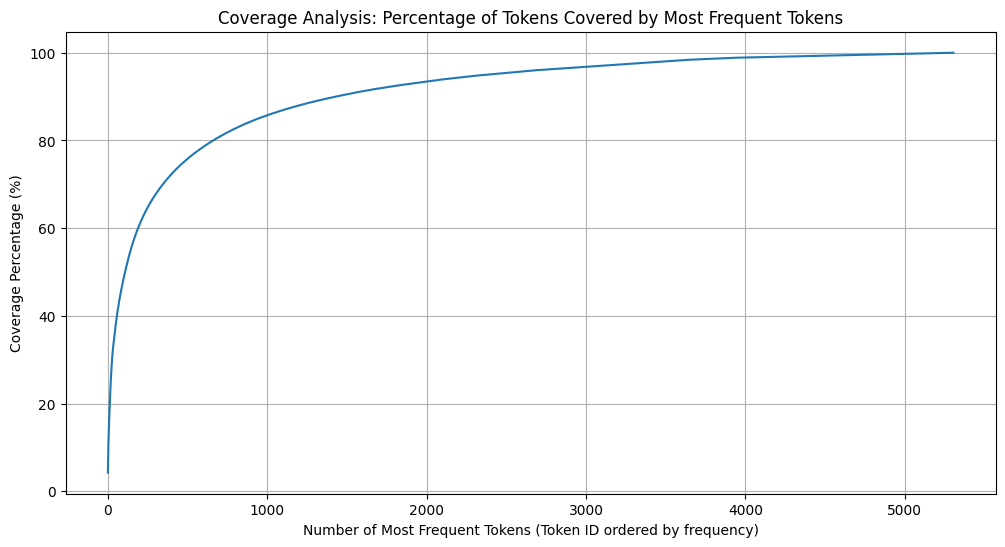

In [33]:
# prompt: Visualize the coverage analysis with the y-axis representing coverage percentage and the x-axis representing the id of tokens (words) ordered by frequency of occurrence. Use a line plot for clarity.

import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import itertools

# Combine all processed tokens from sentence1 and sentence2
all_tokens = list(itertools.chain(*[item for sublist in test_df['sentence1_processed'] for item in sublist])) + \
               list(itertools.chain(*[item for sublist in test_df['sentence2_processed'] for item in sublist]))

# Count token frequencies
token_counts = Counter(all_tokens)

# Sort tokens by frequency in descending order
sorted_tokens = sorted(token_counts.items(), key=lambda item: item[1], reverse=True)

# Extract the sorted tokens
sorted_token_list = [token for token, count in sorted_tokens]

def calculate_coverage(tokens, vocabulary):
    covered_count = sum(1 for token in tokens if token in vocabulary)
    return (covered_count / len(tokens)) * 100 if len(tokens) > 0 else 0

# Calculate coverage for increasing vocabulary sizes (based on sorted token frequency)
coverage_data = []
for i in range(1, len(sorted_token_list) + 1):
    current_vocabulary = set(sorted_token_list[:i])
    total_covered_tokens = 0
    total_tokens = 0

    for processed_sentences in test_df['sentence1_processed']:
        all_tokens_in_doc = list(itertools.chain(*processed_sentences))
        total_covered_tokens += sum(1 for token in all_tokens_in_doc if token in current_vocabulary)
        total_tokens += len(all_tokens_in_doc)

    for processed_sentences in test_df['sentence2_processed']:
        all_tokens_in_doc = list(itertools.chain(*processed_sentences))
        total_covered_tokens += sum(1 for token in all_tokens_in_doc if token in current_vocabulary)
        total_tokens += len(all_tokens_in_doc)

    coverage_percentage = (total_covered_tokens / total_tokens) * 100 if total_tokens > 0 else 0
    coverage_data.append(coverage_percentage)

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(sorted_token_list) + 1), coverage_data)
plt.xlabel('Number of Most Frequent Tokens (Token ID ordered by frequency)')
plt.ylabel('Coverage Percentage (%)')
plt.title('Coverage Analysis: Percentage of Tokens Covered by Most Frequent Tokens')
plt.grid(True)
plt.show()


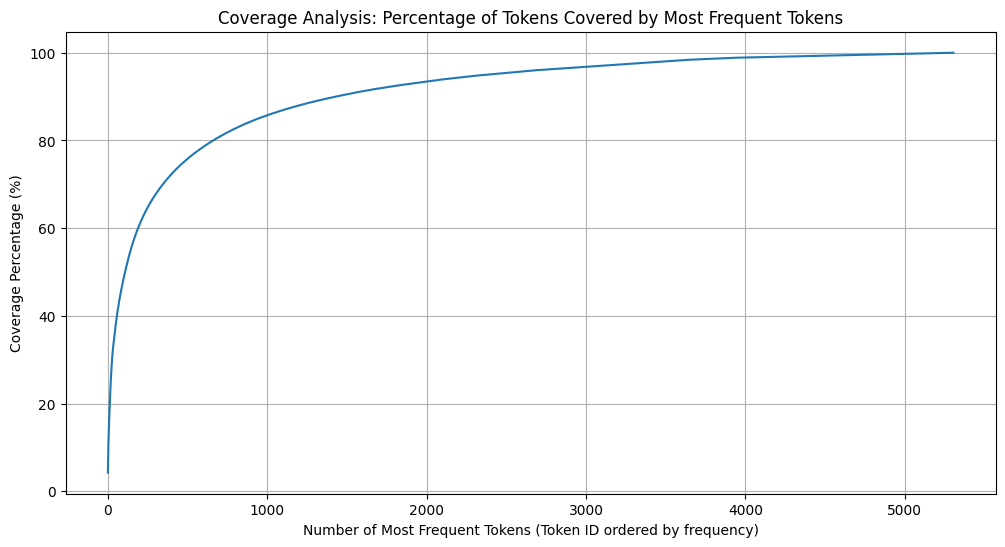

In [34]:
# prompt: Visualize the coverage analysis with the y-axis representing coverage percentage and the x-axis representing the id of tokens (words) ordered by frequency of occurrence. Use a line plot for clarity.

import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import itertools

# Combine all processed tokens from sentence1 and sentence2
all_tokens = list(itertools.chain(*[item for sublist in train_df['sentence1_processed'] for item in sublist])) + \
               list(itertools.chain(*[item for sublist in train_df['sentence2_processed'] for item in sublist]))

# Count token frequencies
token_counts = Counter(all_tokens)

# Sort tokens by frequency in descending order
sorted_tokens = sorted(token_counts.items(), key=lambda item: item[1], reverse=True)

# Extract the sorted tokens
sorted_token_list = [token for token, count in sorted_tokens]

def calculate_coverage(tokens, vocabulary):
    covered_count = sum(1 for token in tokens if token in vocabulary)
    return (covered_count / len(tokens)) * 100 if len(tokens) > 0 else 0

# Calculate coverage for increasing vocabulary sizes (based on sorted token frequency)
coverage_data = []
for i in range(1, len(sorted_token_list) + 1):
    current_vocabulary = set(sorted_token_list[:i])
    total_covered_tokens = 0
    total_tokens = 0

    for processed_sentences in train_df['sentence1_processed']:
        all_tokens_in_doc = list(itertools.chain(*processed_sentences))
        total_covered_tokens += sum(1 for token in all_tokens_in_doc if token in current_vocabulary)
        total_tokens += len(all_tokens_in_doc)

    for processed_sentences in train_df['sentence2_processed']:
        all_tokens_in_doc = list(itertools.chain(*processed_sentences))
        total_covered_tokens += sum(1 for token in all_tokens_in_doc if token in current_vocabulary)
        total_tokens += len(all_tokens_in_doc)

    coverage_percentage = (total_covered_tokens / total_tokens) * 100 if total_tokens > 0 else 0
    coverage_data.append(coverage_percentage)

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(sorted_token_list) + 1), coverage_data)
plt.xlabel('Number of Most Frequent Tokens (Token ID ordered by frequency)')
plt.ylabel('Coverage Percentage (%)')
plt.title('Coverage Analysis: Percentage of Tokens Covered by Most Frequent Tokens')
plt.grid(True)
plt.show()


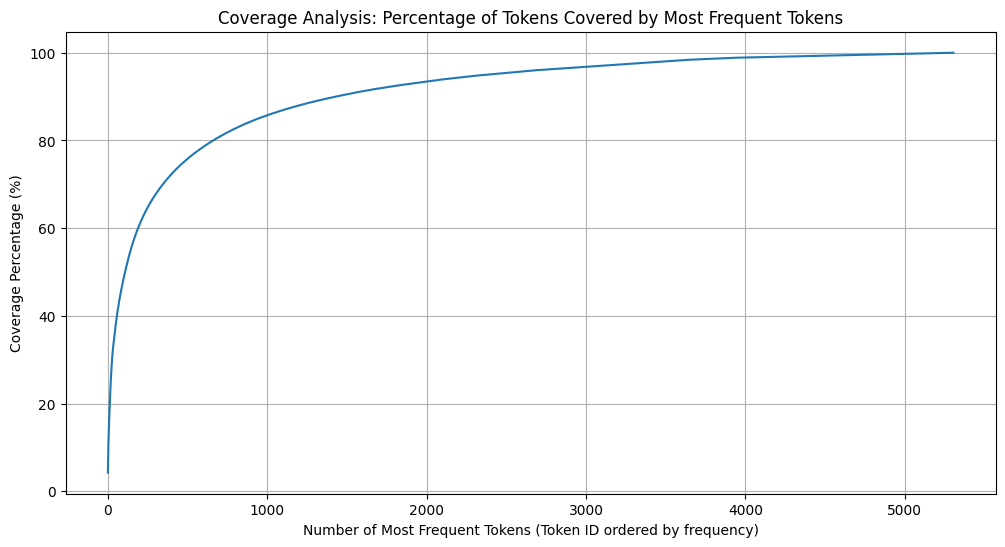

In [35]:
# prompt: Visualize the coverage analysis with the y-axis representing coverage percentage and the x-axis representing the id of tokens (words) ordered by frequency of occurrence. Use a line plot for clarity.

import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import itertools

# Combine all processed tokens from sentence1 and sentence2
all_tokens = list(itertools.chain(*[item for sublist in dev_df['sentence1_processed'] for item in sublist])) + \
               list(itertools.chain(*[item for sublist in dev_df['sentence2_processed'] for item in sublist]))

# Count token frequencies
token_counts = Counter(all_tokens)

# Sort tokens by frequency in descending order
sorted_tokens = sorted(token_counts.items(), key=lambda item: item[1], reverse=True)

# Extract the sorted tokens
sorted_token_list = [token for token, count in sorted_tokens]

def calculate_coverage(tokens, vocabulary):
    covered_count = sum(1 for token in tokens if token in vocabulary)
    return (covered_count / len(tokens)) * 100 if len(tokens) > 0 else 0

# Calculate coverage for increasing vocabulary sizes (based on sorted token frequency)
coverage_data = []
for i in range(1, len(sorted_token_list) + 1):
    current_vocabulary = set(sorted_token_list[:i])
    total_covered_tokens = 0
    total_tokens = 0

    for processed_sentences in dev_df['sentence1_processed']:
        all_tokens_in_doc = list(itertools.chain(*processed_sentences))
        total_covered_tokens += sum(1 for token in all_tokens_in_doc if token in current_vocabulary)
        total_tokens += len(all_tokens_in_doc)

    for processed_sentences in dev_df['sentence2_processed']:
        all_tokens_in_doc = list(itertools.chain(*processed_sentences))
        total_covered_tokens += sum(1 for token in all_tokens_in_doc if token in current_vocabulary)
        total_tokens += len(all_tokens_in_doc)

    coverage_percentage = (total_covered_tokens / total_tokens) * 100 if total_tokens > 0 else 0
    coverage_data.append(coverage_percentage)

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(sorted_token_list) + 1), coverage_data)
plt.xlabel('Number of Most Frequent Tokens (Token ID ordered by frequency)')
plt.ylabel('Coverage Percentage (%)')
plt.title('Coverage Analysis: Percentage of Tokens Covered by Most Frequent Tokens')
plt.grid(True)
plt.show()


In [10]:
# import nltk
# # Download the IMDb movie reviews dataset
# nltk.download('movie_reviews')


# from nltk.corpus import movie_reviews
# # Access the movie reviews and labels
# documents = [(list(movie_reviews.words(fileid)), category)
# for category in movie_reviews.categories()
# for fileid in movie_reviews.fileids(category)]
# # Shuffle the documents to ensure a balanced distribution of positive and negative reviews
# import random
# random.shuffle(documents)


# # Print the first review and its label
# print("Sample Review:", documents[0][0][:10]) # Displaying the first 10 words for brevity
# print("Label:", documents[0][1])

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


Sample Review: ['kate', '(', 'jennifer', 'aniston', ')', 'is', 'having', 'some', 'problems', '.']
Label: neg


In [15]:
# documents[0]

(['kate',
  '(',
  'jennifer',
  'aniston',
  ')',
  'is',
  'having',
  'some',
  'problems',
  '.',
  'it',
  'appears',
  'the',
  'twenty',
  '-',
  'eight',
  'year',
  'old',
  'is',
  'not',
  'happy',
  'with',
  'her',
  'slow',
  'progression',
  'up',
  'the',
  'company',
  'ladder',
  ',',
  'and',
  'her',
  'love',
  'life',
  'apparently',
  'leaves',
  'something',
  'to',
  'be',
  'desired',
  '.',
  'she',
  'learns',
  'that',
  'her',
  'problems',
  'are',
  'related',
  ',',
  'as',
  'the',
  'owner',
  'of',
  'her',
  'advertising',
  'agency',
  ',',
  'mr',
  '.',
  'mercer',
  '(',
  'kevin',
  'dunn',
  ')',
  ',',
  'explains',
  'to',
  'her',
  'that',
  'her',
  'single',
  'status',
  'does',
  'not',
  'bode',
  'well',
  'with',
  'the',
  'company',
  '.',
  'her',
  'freedom',
  'would',
  'make',
  'her',
  'more',
  'likely',
  'to',
  'leave',
  'the',
  'company',
  ',',
  'taking',
  'clients',
  'with',
  'her',
  '.',
  'a',
  'solution',
